In [5]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image
import cv2
import cvzone
import matplotlib.pyplot as plt
import torchvision
import os
import numpy as np 
#from mtcnn.mtcnn import MTCNN

In [ ]:
from torch.utils.data import Dataset, DataLoader
class FaceRecognitionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))

        
        self.file_paths = []
        self.labels = []
        for i, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for file_name in os.listdir(class_dir):
                self.file_paths.append(os.path.join(class_dir, file_name))
                self.labels.append(i)

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        label = self.labels[idx]

        image    = cv2.imread(img_path)
        image    = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image    = Image.fromarray(image)

        
        if self.transform:
            img = self.transform(image)
        plt.imshow(np.transpose(np.array(img), (1, 2, 0)))
        return img, label

In [3]:

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((160, 160)),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
dataset = FaceRecognitionDataset('./FACES', transform = transform)
dataset.__len__()

11

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
# If required, create a face detection pipeline using MTCNN:
detector = MTCNN(keep_all = True, device = device, margin = 100)

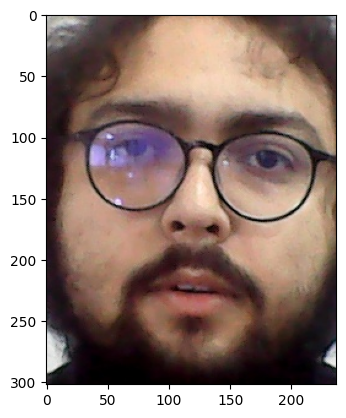

In [7]:
img_p = "./FACES/Felps/img_17.jpg"
# Detect Faces
img = cv2.imread(img_p)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(img)

boxes, _ = detector.detect(pil_img)
# Calculate embedding (unsqueeze to add batch dimension)
faces = []
for i in boxes:
    x, y, x1, y1 = i
    faces.append(img[int(y):int(y1), int(x):int(x1)])

ctt = len(faces)
ct = 0
# SHOW DETECTED FACES
for i in faces:
    pil = Image.fromarray(i)
    plt.figure(ct)
    ct+=1
    plt.imshow(pil)


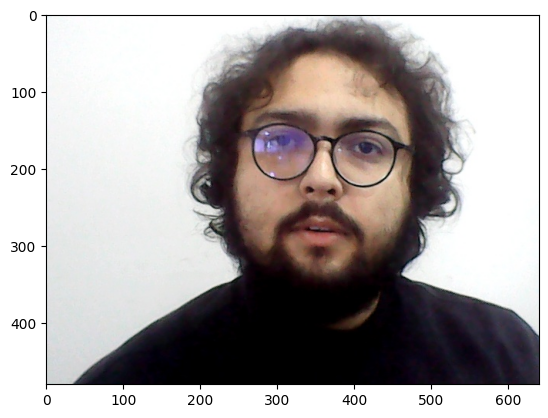

In [9]:
plt.imshow(img)

Number of faces: 1


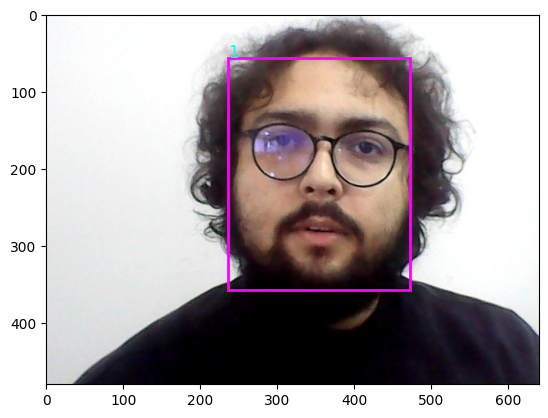

In [10]:
fig, ax = plt.subplots()
ax.imshow(img)
if( boxes is not None ):
    for i, box in enumerate(boxes):
        x, y, w, h = box
        ax.text(x, y, str(i+1), fontsize = 12, color='cyan')
        rect = plt.Rectangle((x, y), w-x, h-y, fill= False, color='magenta', linewidth=2)
        ax.add_patch(rect)
    print(f"Number of faces: {len(boxes)}")
else:
    print("No faces")

In [10]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print( "Error: Could not open camera" )

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame")
        break
    img_t = torchvision.transforms.ToTensor()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img)

    boxes, _ = detector.detect(pil_img)

    if( boxes is not None ):
        for i, box in enumerate(boxes):
            x, y, w, h = box
            #ax.text(x, y, str(i+1), fontsize = 12, color='cyan')
            #rect = plt.Rectangle((x, y), w-x, h-y, fill= False, color='magenta', linewidth=2)
            #ax.add_patch(rect)
            x, y, w, h = int(x+1), int(y+1), int(w-1), int(h-1)
            img_face = img[y: h, x: w]
            if len(img_face) > 2:
                cv2.imshow('face', img_face)
            #break
            print(x, y, w, h)
            cv2.rectangle(frame, (int(x), int(y)), (int(w), int(h)), (0,0,255), 2)
          
            cvzone.putTextRect(frame, str(i+1), [int(x), int(y+10)], scale=1, thickness =1)
            print(f"Number of faces: {len(boxes)}")
    else:
        print("No faces")
    
    
    cv2.imshow('Webcam', frame)

    if( cv2.waitKey(1) & 0xFF == ord('q')):
        break
cap.release()
cv2.destroyAllWindows()

No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
No faces
281 69 485 329
Number of faces: 1
261 38 486 344
Number of faces: 1
267 54 483 347
Number of faces: 1
255 48 485 366
Number of faces: 2
594 275 617 303
Number of faces: 2
252 65 476 371
Number of faces: 1
240 82 478 415
Number of faces: 1
216 78 455 409
Number of faces: 1
222 86 449 418
Number of faces: 1
223 89 448 415
Number of faces: 1
224 83 449 406
Number of faces: 1
225 65 456 396
Number of faces: 1
221 35 447 352
Number of faces: 1
232 29 440 315
Number of faces: 1
2

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [8]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import tensorflow as tf
import torch
from PIL import Image
import cv2
import cvzone
import matplotlib.pyplot as plt
import torchvision
import os
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# ----------- MODELS ----------- #
resnet = InceptionResnetV1(pretrained='vggface2', classify=True).eval()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
detector = MTCNN(keep_all = True, device = device, margin = 10)
#---------------------------------#

def get_face_embedding(image):
    # Convert image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(image_rgb)

    # Detect face and get bounding box
    boxes, _ = detector.detect(pil_image)

    if boxes is None or len(boxes) == 0:
        return None

    # Extract face from image
    x, y, w, h = boxes[0].astype(int)
    face_image = pil_image.crop((x, y, w, h))

    # Resize face image to match model input size
    face_tensor = transform(face_image).unsqueeze(0).to(device)
    resnet.to(device)
    # Get face embedding using InceptionResnetV1 model
    with torch.no_grad():  # Disable gradient computation
        embedding = resnet(face_tensor)

    return embedding


# Define known faces and their embeddings (you need to populate this with your own known faces)
known_faces = {
    "felps": get_face_embedding((cv2.imread("FACES/Felps/img_17.jpg"))),
    "wagnao": get_face_embedding(cv2.imread("FACES/Wagner/img_5.jpg")),
    "mateus": get_face_embedding(cv2.imread("FACES/Mateus/img_3.jpg")),
    "marcelo": get_face_embedding(cv2.imread("FACES/Marcelo/img_296.jpg")),
    "adenilson": get_face_embedding(cv2.imread("FACES/Adenilson/img_32.jpg")),
    # Add more known faces as needed
}

In [9]:
def save_checkpoint(state, filename = "my_checkpoint_xx.pth.tar"):
    print("=> Saving Checkpoint")
    torch.save(state, filename)

def load_checkpoint(checkpoint_path, model):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['state_dict'])

# One code

In [10]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import tensorflow as tf
import torch
from PIL import Image
import cv2
import cvzone
import matplotlib.pyplot as plt
import torchvision
import os
import numpy as np
from collections import Counter
from datetime import datetime


transform = torchvision.transforms.Compose([                    # Transform to determined size
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
])

# ------ COLECT DATA FROM CAMERA ------ #
count = 0                                    # counter for filename
save = 1                                     # save flag
outFolder = './LIVELINESS/Train/Real'        # output Foler
blurThreshold = 200                          # Blur for Capture of Photos (300, 400)
#---------------------------------------#


# ----------- MODELS ----------- #
resnet = InceptionResnetV1(pretrained='vggface2', classify=True).eval()        # Get face embedding
device = 'cuda' if torch.cuda.is_available() else 'cpu'                        # Device = GPU
detector = MTCNN(keep_all = True, device = device, margin = 10)                # Detect Faces
live = torchvision.models.mobilenet_v2()                                       # Liveliness detection Model
num_classes = 2                                                                # Classes Liveliness (REAL, FAKE)
live.classifier[1] = torch.nn.Linear(live.last_channel, num_classes)           # Dunno
criterion = torch.nn.CrossEntropyLoss()
# 4. Optimize your model
optimizer = torch.optim.SGD(live.parameters(), lr=0.001, momentum=0.9)
load_checkpoint('./liveliness_UP.pth.tar', live)                               # Load model weights
live.eval()                                                                    # Liveliness Model in Eval mode
#---------------------------------#

# -------- MODELS TO GPU -------- #
resnet.to(device)
detector.to(device)
live.to(device)
#---------------------------------#

# ------ Capture From Camera ----- #
cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('rtsp://192.168.3.120:8080/h264_ulaw.sdp')

if not cap.isOpened():
    print( "Error: Could not open camera" )
#----------------------------------#

# ------- Parameters for face Recon ------- #
threshold = 190                                # Threshold for face matching
minDist = 99999                                # Aux min distance 
samples = 10                                   # samples taken until the detection vector is analyzed
#-------------------------------------------#

# ---------- VARIABLES OF FRAME ----------#
who = 'unknown'                                 # Who is it?
text = 'unknown'                                
person = 'unknown'                              # Aux variable for person  
list_person = ['unknown' for _ in range(10)]    # List of all updated detections 
index = 0
identified = []                                 
update_flag = np.zeros(10)                      # Flag vector for updating detection data
size = 0                                        #  not used
last_size = 0                                   # not used
alive = ['fake' for _ in range(10)]             # Vector for updating liveliness
validate_person=[]                              # List of detections that is analyzed once every time sizes reaches 10 
validated = []                                  # List of all validated detections in system execution
#-----------------------------------------#

size = 0
last_size = 0
while True:
    # GET FRAMES
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame")
        break

    # IMAGE CONVERSION
    img_t = torchvision.transforms.ToTensor()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img)

    # DETECT FACES IN FRAME
    boxes, probs = detector.detect(pil_img)
    who = 'unknown'                                  # Set variable incertanty
    # ITERATE OVER THE DETECTED FACES
    if( boxes is not None ):
        if (len(boxes) == 1):
            list_person[1:] = ['unknown' for _ in range(9)]         # Reset Person List Vector
        for i, box in enumerate(boxes):
            if probs[i] > 0.94:                                     # ACCEPTANCE LEVEL
                x, y, w, h = box                                    # BOUNDING BOXES COORDINATES
                x, y, w, h = int(x+1), int(y+1), int(w-1), int(h-1) # CONVERT TO INT
                img_face = img[y: h, x: w]                          # CROP IMAGE
                
                # ACCEPT ONLY FACES WITH A CONSIDERABLE SIZE
                if (img_face.size) > 50000 and len(img_face[0]) > 2:        # Face needs to be a certain size
                    img_face = cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB)    # Color convertion becouse of openCV
                    pil_crop = Image.fromarray(img_face)                    # Crop image on face location
                    # Ensure the input tensor has the correct shape
                    img_tensor = transform(pil_crop)                        # Transform to tensor
                    
                    # Convert the tensor to the expected data type (torch.ByteTensor)
                    img_tensor = img_tensor.unsqueeze(0)                    # Unsqueezem for batch process
                    
                    # Pass the tensor to the model
                    liveliness = live(img_tensor.to(device))                # Predict if face is Alive
                    _, predicted = torch.max(liveliness, 1)                 # Get the index of the class with 
                                                                            # the highest probability
                    
                    cv2.imshow('face', img_face)                            # Show face
                    
                    # Blur calc For saving and recon
                    blurValue = cv2.Laplacian(img_face, cv2.CV_64F).var()
                    # Embeddings (face-info)
                    detected_embedding = get_face_embedding(img_face)       # Get face embedding of detected face
                    
                    if (detected_embedding is not None):                    # Got Embedding
                        minDist = 99999
                        # ITERATE OVER THE KNOWN FACES
                        for name, known_emb in known_faces.items():
                            if known_emb is not None:
                                distance = np.linalg.norm(detected_embedding.cpu() - known_emb.cpu())
                                # Determine the face that te sum of all distances is most similar (accept a level of Blur)
                                if (blurValue > blurThreshold) and (distance < threshold) and (distance < minDist):
                                    minDist = distance                # Update minDistance
                                    who = name                        # Name of detected person
                                    update_flag[i] = 1                # Flag to change Person List Vector
                                    #print(distance)
                    # SAVE FLAG FOR COLECTING TRAINIG DATA
                    if save:
                        if blurValue > blurThreshold:                                 # Filter based on Blur
                            cv2.imwrite(f"{outFolder}/img_{count}.jpg" , img_face)    # Save image on folder
                            count+=1                                                  # Counter for img name  


                # Show if face is alive or NOT
                for j in range(len(alive)):
                    if j == i:
                        if predicted == 1:                # Update vector of liveliness based on prediction
                            alive[i] = ' REAL'
                        else:
                            alive[i] = ' fake'

                # Update the vector of names of detected person
                if update_flag[i]:
                    person = who
                    update_flag[i] = 0
                    print(person, " Detected!")
                    list_person[i] = person                                # Update on the index of the face
                    # VALIDATE THE PERSON BASED ON SAMPLES
                    if not (person in validate_person):
                        validate_person.append([person, alive[i]])         # Stack up detections  
                        ctt=0
                        if len(validate_person) > samples:                 # When Stack reaches a size -> Analyze
                            # COUNT OCCURRENCES
                            element_to_count = [person, 'REAL']
                            ctt = sum(1 for sublist in validate_person if [sublist[0], sublist[1].strip()] == element_to_count)
                            #print(ctt)
                            if(ctt >= 4) and person not in validated:      # If person is detected 4 times -> isTRUE 
                                validated.append(person)                   # Update validated person List
                                now = datetime.now()                       
                                f_now = now.strftime("%d-%m-%Y %H:%M:%S")  # DateTime of validation
                                print(person, ' Validated at ', f_now, '!')
                            validate_person=[]                             # After the process, reset detection stack
                    
                # Draw BBOX face
                cv2.rectangle(frame, (int(x), int(y)), (int(w), int(h)), (0,0,255), 2)
                # Draw Text detection
                text = str(list_person[i]) + alive[i] + ' ' + str(i)
                cvzone.putTextRect(frame, text, [int(x), int(y+10)], scale=1, thickness =1)
    else:
        #print("No faces")
        list_person = ['unknown' for _ in range(10)]
        identified = []
        text = 'unknown'
        pass
    
    
    cv2.imshow('Webcam', frame)

    if( cv2.waitKey(1) & 0xFF == ord('q')):
        break
cap.release()
cv2.destroyAllWindows()
print(validated)


felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Validated at  05-10-2024 11:18:56 !
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
felps  Detected!
['felps']


In [105]:
update_flag = np.zeros(10)
update_flag

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Class Export

face_frame_size 0:  (90, 63, 3)
Ari
face_frame_size 0:  (129, 90, 3)
Ari
face_frame_size 0:  (67, 56, 3)
Ari
face_frame_size 0:  (130, 85, 3)
Ari
Ari HAD Valid Score:  34022.57191720416 [34022.57191720416]
face_frame_size 0:  (293, 216, 3)
Felipe
face_frame_size 0:  (289, 202, 3)
Felipe
face_frame_size 0:  (293, 201, 3)
Felipe
face_frame_size 0:  (285, 188, 3)
Felipe
face_frame_size 0:  (278, 190, 3)
Felipe
face_frame_size 0:  (249, 199, 3)
Felipe
Felipe HAD Valid Score:  148924.63679498128 [148924.63679498128]
face_frame_size 0:  (290, 216, 3)
Felipe
face_frame_size 0:  (335, 227, 3)
Felipe
face_frame_size 0:  (1615, 1223, 3)
Jaca
Jaca HAD Valid Score:  5925616.0889994 [5925616.0889994]
face_frame_size 0:  (1397, 1253, 3)
Jaca
Jaca HAD Valid Score:  5251487.068135755 [5925616.0889994, 5251487.068135755]
face_frame_size 0:  (1269, 968, 3)
Jaca
face_frame_size 0:  (1709, 1221, 3)
Jaca
face_frame_size 0:  (816, 611, 3)
Jaca
face_frame_size 0:  (811, 678, 3)
Jaca
face_frame_size 0:  (342,

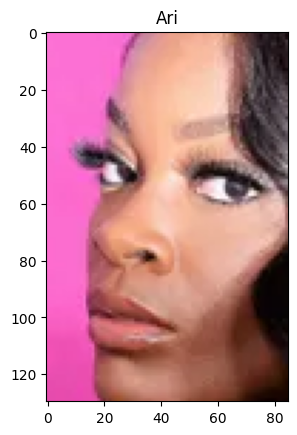

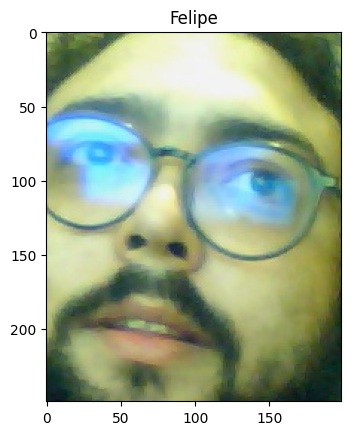

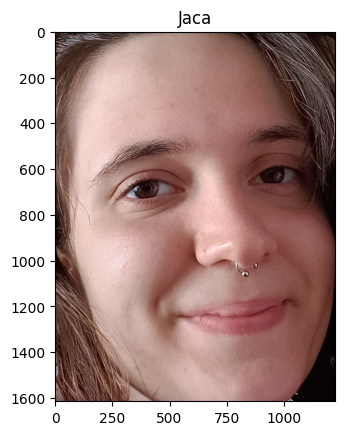

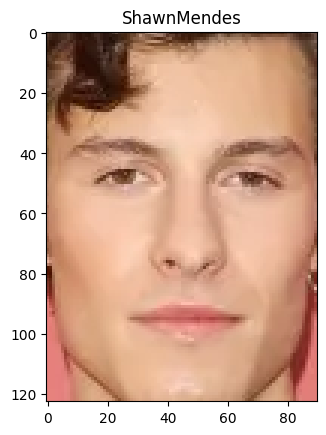

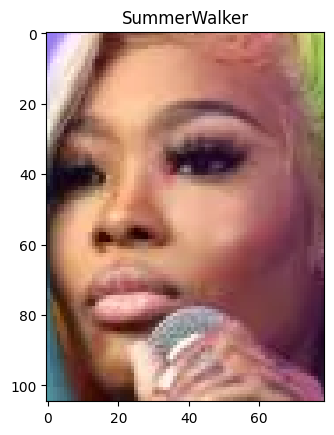

face_frame_size 0:  (90, 63, 3)
Ari
face_frame_size 0:  (129, 90, 3)
Ari
face_frame_size 0:  (67, 56, 3)
Ari
face_frame_size 0:  (130, 85, 3)
Ari
Ari HAD Valid Score:  34022.57191720416 [34022.57191720416]
face_frame_size 0:  (293, 216, 3)
Felipe
face_frame_size 0:  (289, 202, 3)
Felipe
face_frame_size 0:  (293, 201, 3)
Felipe
face_frame_size 0:  (285, 188, 3)
Felipe
face_frame_size 0:  (278, 190, 3)
Felipe
face_frame_size 0:  (249, 199, 3)
Felipe
Felipe HAD Valid Score:  148924.63679498128 [148924.63679498128]
face_frame_size 0:  (290, 216, 3)
Felipe
face_frame_size 0:  (335, 227, 3)
Felipe
face_frame_size 0:  (1615, 1223, 3)
Jaca
Jaca HAD Valid Score:  5925616.0889994 [5925616.0889994]
face_frame_size 0:  (1397, 1253, 3)
Jaca
Jaca HAD Valid Score:  5251487.068135755 [5925616.0889994, 5251487.068135755]
face_frame_size 0:  (1269, 968, 3)
Jaca
face_frame_size 0:  (1709, 1221, 3)
Jaca
face_frame_size 0:  (816, 611, 3)
Jaca
face_frame_size 0:  (811, 678, 3)
Jaca
face_frame_size 0:  (342,

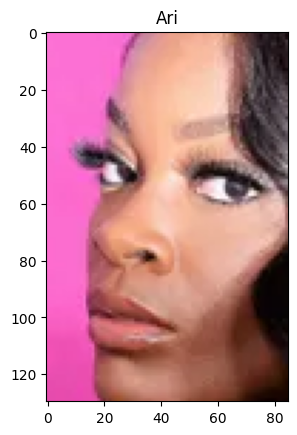

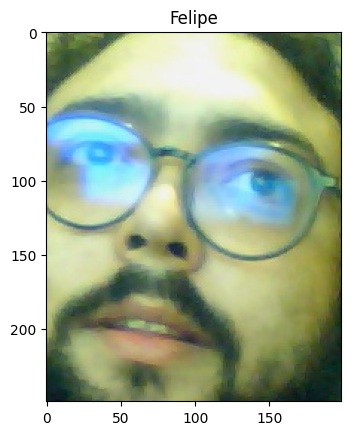

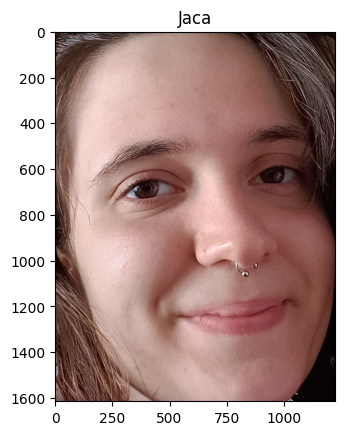

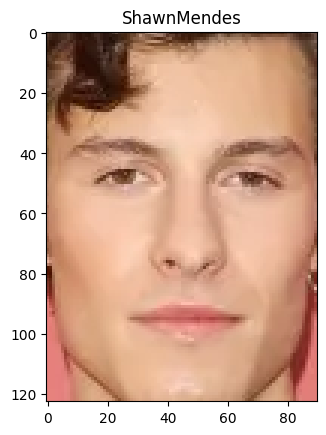

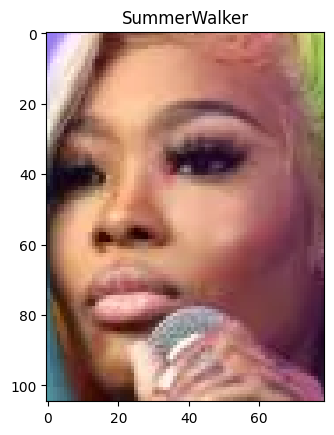

In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image
import cv2
import cvzone
import matplotlib.pyplot as plt
import torchvision
import os
import numpy as np
from collections import Counter
from datetime import datetime

class dotFace:
    def __init__(self, outputFolder='./DATA'):
        # ------ COLECT DATA FROM CAMERA ------ #
        self.count = 0                                    # counter for filename
        self.save = 0                                     # save flag
        self.outFolder = outputFolder                     # output Foler
        self.blurThreshold = 200                          # Blur for Capture of Photos (300, 400)
        #---------------------------------------#
        # ----------- MODELS ----------- #
        self.resnet = InceptionResnetV1(pretrained='vggface2', classify=True).eval()        # Get face embedding
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'                        # Device = GPU
        self.detector = MTCNN(keep_all = True, device = self.device, margin = 10)           # Detect Faces
        self.live = torchvision.models.mobilenet_v2()                                       # Liveliness detection Model
        num_classes = 2                                                                     # Classes Liveliness (REAL, FAKE)
        self.live.classifier[1] = torch.nn.Linear(self.live.last_channel, num_classes)      # Dunno
        criterion = torch.nn.CrossEntropyLoss()
        # 4. Optimize your model
        optimizer = torch.optim.SGD(self.live.parameters(), lr=0.001, momentum=0.9)
        self.load_checkpoint('./liveliness_UP.pth.tar', self.live)                               # Load model weights
        self.live.eval()                                                                         # Liveliness Model in Eval mode
        #---------------------------------#
        # -------- MODELS TO GPU -------- #
        self.resnet.to(self.device)
        self.detector.to(self.device)
        self.live.to(self.device)
        #---------------------------------#
        # ------- Parameters for face Recon ------- #
        self.threshold = 190                                # Threshold for face matching
        self.minDist = 99999                                # Aux min distance 
        self.samples = 10                                   # samples taken until the detection vector is analyzed
        #-------------------------------------------#
        self.transform = torchvision.transforms.Compose([                    # Transform to determined size
            torchvision.transforms.Resize((160, 160)),
            torchvision.transforms.ToTensor(),
        ])
    def check_lighting(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        mean_intensity = np.mean(gray)
        std_intensity = np.std(gray)
        return mean_intensity, std_intensity
    def setBlurThreshold(self, value):
        self.blurThreshold = value
    def setFaceMatchTreshold(self, value):
        self.threshold = value
    def setSampleSize(self, value):
        self.samples = value
    def setSaveFaces(self, value):
        self.save = value
    def save_checkpoint(self, state, filename = "my_checkpoint_xx.pth.tar"):
        print("=> Saving Checkpoint")
        torch.save(state, filename)
    def load_checkpoint(self, checkpoint_path, model):
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['state_dict'])
    def latchCapture(self, link):
        self.cap = cv2.VideoCapture(link)
    def get_face_embedding(self, image):
        # Convert image from BGR to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(image_rgb)
    
        # Detect face and get bounding box
        boxes, _ = self.detector.detect(pil_image)
    
        if boxes is None or len(boxes) == 0:
            return None
    
        # Extract face from image
        x, y, w, h = boxes[0].astype(int)
        face_image = pil_image.crop((x, y, w, h))
    
        # Resize face image to match model input size
        face_tensor = self.transform(face_image).unsqueeze(0).to(self.device)
        self.resnet.to(self.device)
        # Get face embedding using InceptionResnetV1 model
        with torch.no_grad():  # Disable gradient computation
            embedding = self.resnet(face_tensor)
    
        return embedding
    def loadFaces(self, folder):
        # Define known faces and their embeddings (you need to populate this with your own known faces)
        self.known_faces = {
            "felps":        self.get_face_embedding((cv2.imread("FACES/Felps/img_17.jpg"))),
            "wagnao":       self.get_face_embedding(cv2.imread("FACES/Wagner/img_5.jpg")),
            "mateus":       self.get_face_embedding(cv2.imread("FACES/Mateus/img_3.jpg")),
            "marcelo":      self.get_face_embedding(cv2.imread("FACES/Marcelo/img_296.jpg")),
            "adenilson":    self.get_face_embedding(cv2.imread("FACES/Adenilson/img_32.jpg")),
            # Add more known faces as needed
        }
    def calcBlur(self, frame):
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        variance = cv2.Laplacian(gray, cv2.CV_64F).var()
        return variance
    def eye_distance(self, frame):
        boxes, probs, landmarks = self.detector.detect(frame, landmarks=True)
        if landmarks is not None:
            left_eye = landmarks[0][0]  # Coordenadas do olho esquerdo
            right_eye = landmarks[0][1]  # Coordenadas do olho direito
            eye_distance = np.linalg.norm(left_eye - right_eye)
        return eye_distance
    def score_frame(self, frame):
        sharpness = self.calcBlur(frame)
        mean, std  = self.check_lighting(frame)
        #eye_distance = self.eye_distance(frame)

        if sharpness < 100:
            return 0
        if not (100 < mean < 200 and 30 < std < 100):
            return 0
        

        #print("eye Distance: ", eye_distance)
        return sharpness + std + frame.size
    def loadFilePaths(self, folder):
        self.rootdir = folder
        self.regitered_faces = sorted(os.listdir(self.rootdir))
        self.file_paths = []
        self.labels  = []
        for i, registered_names in enumerate(self.regitered_faces):
            name_dir = os.path.join(self.rootdir, registered_names)
            for file_name in os.listdir(name_dir):
                self.file_paths.append(os.path.join(name_dir, file_name))
                self.labels.append(i)
    def loadFacesByFolder(self, folder):
        self.known_faces = {}
        self.loadFilePaths(folder)
        for i, person in enumerate(self.regitered_faces):           # para cada pessoa
            name_dir = os.path.join(self.rootdir, person)
            self.scores = []
            self.images = []
            self.images_p = []
            for file_path in os.listdir(name_dir):                  # itere sobre as fotos da pessoa
                image_path = os.path.join(name_dir, file_path)
                img = cv2.imread(image_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                pil_img = Image.fromarray(img)

                boxes, probs = self.detector.detect(pil_img)

                faces = []                  # faces na imagem
                if boxes is not None:
                    for k, p in enumerate(boxes):
                        if(probs[k] > .95):
                            x, y, x1, y1 = p
                            faces.append(img[int(y):int(y1), int(x):int(x1)])
                    for k, p in enumerate(faces):
                        pil = Image.fromarray(p)
                        if(p.shape[0] > 50 and p.shape[1] > 50 and p.shape[2] ==  3):
                            print(f"face_frame_size {k}: ", p.shape)
                            print(person)
                            if(self.score_frame(p) > 0):
                                self.scores.append(self.score_frame(p))
                                self.images.append(pil)
                                self.images_p.append(image_path)
                                print(f"{person} HAD Valid Score: ", self.score_frame(p), self.scores)
                                # print(image_path)
                                # print( img.shape , "      ", )
                                # print("Score: ", self.score_frame(p))
                                # plt.figure(image_path)
                                # plt.title(person)
                                # plt.imshow(pil)
            if(self.scores != []):
                index_max_score = self.scores.index(max(self.scores))
                image_max_score = self.images[index_max_score]
                image_path_max_score = self.images_p[index_max_score]
                plt.figure(person)
                plt.title(person)
                plt.imshow(image_max_score)
                self.known_faces[person] = self.get_face_embedding(cv2.imread(image_path_max_score))
            else:
                print(f"{person} HAD NO VALID SCORE")
    
        print(self.known_faces)
    
    def run(self):
        # ---------- VARIABLES OF FRAME ----------#
        who = 'unknown'                                 # Who is it?
        text = 'unknown'                                
        person = 'unknown'                              # Aux variable for person  
        list_person = ['unknown' for _ in range(10)]    # List of all updated detections 
        index = 0
        identified = []                                 
        update_flag = np.zeros(10)                      # Flag vector for updating detection data
        size = 0                                        #  not used
        last_size = 0                                   # not used
        alive = ['fake' for _ in range(10)]             # Vector for updating liveliness
        validate_person=[]                              # List of detections that is analyzed once every time sizes reaches 10 
        validated = []                                  # List of all validated detections in system execution
        #-----------------------------------------#
        # ------ Capture From Camera ----- #
        self.cap = cv2.VideoCapture(0)
        #cap = cv2.VideoCapture('rtsp://192.168.3.120:8080/h264_ulaw.sdp')
        
        if not self.cap.isOpened():
            print( "Error: Could not open camera" )
        #----------------------------------#
        while True:
            # GET FRAMES
            ret, frame = self.cap.read()
            if not ret:
                print("Error: Failed to capture frame")
                break
        
            # IMAGE CONVERSION
            img_t = torchvision.transforms.ToTensor()
            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            pil_img = Image.fromarray(img)
        
            # DETECT FACES IN FRAME
            boxes, probs , landmarks = self.detector.detect(pil_img, landmarks=True)
            who = 'unknown'                                  # Set variable incertanty
            # ITERATE OVER THE DETECTED FACES
            if( boxes is not None ):
                if (len(boxes) == 1):
                    list_person[1:] = ['unknown' for _ in range(9)]         # Reset Person List Vector
                for i, box in enumerate(boxes):
                    if probs[i] > 0.94:                                     # ACCEPTANCE LEVEL
                        x, y, w, h = box                                    # BOUNDING BOXES COORDINATES
                        x, y, w, h = int(x+1), int(y+1), int(w-1), int(h-1) # CONVERT TO INT
                        img_face = img[y: h, x: w]                          # CROP IMAGE
                        
                        # ACCEPT ONLY FACES WITH A CONSIDERABLE SIZE
                        if (img_face.size) > 50000 and len(img_face[0]) > 2:        # Face needs to be a certain size
                            img_face = cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB)    # Color convertion becouse of openCV
                            pil_crop = Image.fromarray(img_face)                    # Crop image on face location
                            # Ensure the input tensor has the correct shape
                            img_tensor = self.transform(pil_crop)                   # Transform to tensor
                            
                            # Convert the tensor to the expected data type (torch.ByteTensor)
                            img_tensor = img_tensor.unsqueeze(0)                    # Unsqueezem for batch process
                            
                            # Pass the tensor to the model
                            liveliness = self.live(img_tensor.to(self.device))      # Predict if face is Alive
                            _, predicted = torch.max(liveliness, 1)                 # Get the index of the class with 
                                                                                    # the highest probability
                            
                            cv2.imshow('face', img_face)                            # Show face
                            
                            # Blur calc For saving and recon
                            blurValue = cv2.Laplacian(img_face, cv2.CV_64F).var()
                            # Embeddings (face-info)
                            detected_embedding = self.get_face_embedding(img_face)       # Get face embedding of detected face
                            
                            if (detected_embedding is not None):                    # Got Embedding
                                minDist = 99999
                                # ITERATE OVER THE KNOWN FACES
                                for name, known_emb in self.known_faces.items():
                                    if known_emb is not None:
                                        distance = np.linalg.norm(detected_embedding.cpu() - known_emb.cpu())
                                        # Determine the face that te sum of all distances is most similar (accept a level of Blur)
                                        if (blurValue > self.blurThreshold) and (distance < self.threshold) and (distance < self.minDist):
                                            minDist = distance                # Update minDistance
                                            who = name                        # Name of detected person
                                            update_flag[i] = 1                # Flag to change Person List Vector
                                            #print(distance)
                            # SAVE FLAG FOR COLECTING TRAINIG DATA
                            if self.save:
                                if blurValue > self.blurThreshold:                            # Filter based on Blur
                                    cv2.imwrite(f"{self.outFolder}/img_{count}.jpg" , img_face)    # Save image on folder
                                    count+=1                                                  # Counter for img name  
        
        
                        # Show if face is alive or NOT
                        for j in range(len(alive)):
                            if j == i:
                                if predicted == 1:                # Update vector of liveliness based on prediction
                                    alive[i] = ' REAL'
                                else:
                                    alive[i] = ' fake'
        
                        # Update the vector of names of detected person
                        if update_flag[i]:
                            person = who
                            update_flag[i] = 0
                            print(person, " Detected!")
                            list_person[i] = person                                # Update on the index of the face
                            # VALIDATE THE PERSON BASED ON SAMPLES
                            if not (person in validate_person):
                                validate_person.append([person, alive[i]])         # Stack up detections  
                                ctt=0
                                if len(validate_person) > self.samples:            # When Stack reaches a size -> Analyze
                                    # COUNT OCCURRENCES
                                    element_to_count = [person, 'REAL']
                                    ctt = sum(1 for sublist in validate_person if [sublist[0], sublist[1].strip()] == element_to_count)
                                    #print(ctt)
                                    if(ctt >= 4) and person not in validated:      # If person is detected 4 times -> isTRUE 
                                        validated.append(person)                   # Update validated person List
                                        now = datetime.now()                       
                                        f_now = now.strftime("%d-%m-%Y %H:%M:%S")  # DateTime of validation
                                        print(person, ' Validated at ', f_now, '!')
                                    validate_person=[]                             # After the process, reset detection stack
                            
                        # Draw BBOX face
                        cv2.rectangle(frame, (int(x), int(y)), (int(w), int(h)), (0,0,255), 2)
                        # Draw Text detection
                        text = str(list_person[i]) + alive[i] + ' ' + str(i)
                        cvzone.putTextRect(frame, text, [int(x), int(y+10)], scale=1, thickness =1)
            else:
                #print("No faces")
                list_person = ['unknown' for _ in range(10)]
                identified = []
                text = 'unknown'
                pass
            
            
            cv2.imshow('Webcam', frame)
        
            if( cv2.waitKey(1) & 0xFF == ord('q')):
                break
        self.cap.release()
        cv2.destroyAllWindows()
        print(validated)
    def runNoLiveliness(self):
                # ---------- VARIABLES OF FRAME ----------#
        who = 'unknown'                                 # Who is it?
        text = 'unknown'                                
        person = 'unknown'                              # Aux variable for person  
        list_person = ['unknown' for _ in range(10)]    # List of all updated detections 
        index = 0
        identified = []                                 
        update_flag = np.zeros(10)                      # Flag vector for updating detection data
        size = 0                                        #  not used
        last_size = 0                                   # not used
        alive = ['fake' for _ in range(10)]             # Vector for updating liveliness
        validate_person=[]                              # List of detections that is analyzed once every time sizes reaches 10 
        validated = []                                  # List of all validated detections in system execution
        #-----------------------------------------#
        # ------ Capture From Camera ----- #
        self.cap = cv2.VideoCapture(0)
        #cap = cv2.VideoCapture('rtsp://192.168.3.120:8080/h264_ulaw.sdp')
        
        if not self.cap.isOpened():
            print( "Error: Could not open camera" )
        #----------------------------------#
        while True:
            # GET FRAMES
            ret, frame = self.cap.read()
            if not ret:
                print("Error: Failed to capture frame")
                break
        
            # IMAGE CONVERSION
            img_t = torchvision.transforms.ToTensor()
            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            pil_img = Image.fromarray(img)
        
            # DETECT FACES IN FRAME
            boxes, probs = self.detector.detect(pil_img)
            who = 'unknown'                                  # Set variable incertanty
            # ITERATE OVER THE DETECTED FACES
            if( boxes is not None ):
                if (len(boxes) == 1):
                    list_person[1:] = ['unknown' for _ in range(9)]         # Reset Person List Vector
                for i, box in enumerate(boxes):
                    if probs[i] > 0.94:                                     # ACCEPTANCE LEVEL
                        x, y, w, h = box                                    # BOUNDING BOXES COORDINATES
                        x, y, w, h = int(x+1), int(y+1), int(w-1), int(h-1) # CONVERT TO INT
                        img_face = img[y: h, x: w]                          # CROP IMAGE
                        
                        # ACCEPT ONLY FACES WITH A CONSIDERABLE SIZE
                        if (img_face.size) > 50000 and len(img_face[0]) > 2:        # Face needs to be a certain size
                            img_face = cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB)    # Color convertion becouse of openCV
                            pil_crop = Image.fromarray(img_face)                    # Crop image on face location
                            # Ensure the input tensor has the correct shape
                            img_tensor = self.transform(pil_crop)                   # Transform to tensor
                            
                            # Convert the tensor to the expected data type (torch.ByteTensor)
                            img_tensor = img_tensor.unsqueeze(0)                    # Unsqueezem for batch process
                            
                            # Pass the tensor to the model
                            liveliness = self.live(img_tensor.to(self.device))      # Predict if face is Alive
                            _, predicted = torch.max(liveliness, 1)                 # Get the index of the class with 
                                                                                    # the highest probability
                            
                            cv2.imshow('face', img_face)                            # Show face
                            
                            # Blur calc For saving and recon
                            blurValue = cv2.Laplacian(img_face, cv2.CV_64F).var()
                            # Embeddings (face-info)
                            detected_embedding = self.get_face_embedding(img_face)       # Get face embedding of detected face
                            
                            if (detected_embedding is not None):                    # Got Embedding
                                self.minDist = 99999
                                # ITERATE OVER THE KNOWN FACES
                                for name, known_emb in self.known_faces.items():
                                    if known_emb is not None:
                                        distance = np.linalg.norm(detected_embedding.cpu() - known_emb.cpu())
                                        # Determine the face that te sum of all distances is most similar (accept a level of Blur)
                                        if (blurValue > self.blurThreshold) and (distance < self.threshold) and (distance < self.minDist):
                                            self.minDist = distance                # Update minDistance
                                            who = name                        # Name of detected person
                                            update_flag[i] = 1                # Flag to change Person List Vector
                                            #print(distance)
                            # SAVE FLAG FOR COLECTING TRAINIG DATA
                            if self.save:
                                if blurValue > self.blurThreshold:                            # Filter based on Blur
                                    cv2.imwrite(f"{self.outFolder}/img_{count}.jpg" , img_face)    # Save image on folder
                                    count+=1                                                  # Counter for img name  
        
        
        
                        # Update the vector of names of detected person
                        if update_flag[i]:
                            person = who
                            update_flag[i] = 0
                            print(person, " Detected!")
                            list_person[i] = person                                # Update on the index of the face
                            # VALIDATE THE PERSON BASED ON SAMPLES
                            if not (person in validate_person):
                                validate_person.append([person, alive[i]])         # Stack up detections  
                                ctt=0
                                if len(validate_person) > self.samples:            # When Stack reaches a size -> Analyze
                                    # COUNT OCCURRENCES
                                    element_to_count = [person, 'REAL']
                                    ctt = sum(1 for sublist in validate_person if [sublist[0], sublist[1].strip()] == element_to_count)
                                    #print(ctt)
                                    if(ctt >= 4) and person not in validated:      # If person is detected 4 times -> isTRUE 
                                        validated.append(person)                   # Update validated person List
                                        now = datetime.now()                       
                                        f_now = now.strftime("%d-%m-%Y %H:%M:%S")  # DateTime of validation
                                        print(person, ' Validated at ', f_now, '!')
                                    validate_person=[]                             # After the process, reset detection stack
                            
                        # Draw BBOX face
                        cv2.rectangle(frame, (int(x), int(y)), (int(w), int(h)), (0,0,255), 2)
                        # Draw Text detection
                        text = str(list_person[i]) + alive[i] + ' ' + str(i)
                        cvzone.putTextRect(frame, text, [int(x), int(y+10)], scale=1, thickness =1)
            else:
                #print("No faces")
                list_person = ['unknown' for _ in range(10)]
                identified = []
                text = 'unknown'
                pass
            
            
            cv2.imshow('Webcam', frame)
        
            if( cv2.waitKey(1) & 0xFF == ord('q')):
                break
        self.cap.release()
        cv2.destroyAllWindows()
        print(validated)

dotF = dotFace()
dotF.loadFacesByFolder('./DATA_TRAIN')
dotF.runNoLiveliness()
